# TP2 - Exercise 1

## Nome: Mateus Ribeiro da Silva

In [15]:
#Importing some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
#Loading datasets
data_casos = pd.read_csv('TP1/casos_covid_bahia.csv')
data_camas = pd.read_csv('TP1/camas_covid_bahia.csv')

In [21]:
#Show the casos dataset
data_casos

fecha  confirmados  activos  recuperados  decesos  descartados  \
0   2020-06-30          106       29           71        6          574   
1   2020-07-01          114       31           77        6          581   
2   2020-07-02          124       40           78        6          588   
3   2020-07-03          137       53           78        6          606   
4   2020-07-04          154       70           78        6          622   
..         ...          ...      ...          ...      ...          ...   
83  2020-09-21         2589     1319         1209       61         3557   
84  2020-09-22         2714     1371         1282       61         3615   
85  2020-09-23         2841     1464         1313       64         3658   
86  2020-09-24         2906     1474         1366       66         3682   
87  2020-09-25         3012     1512         1434       66         3738   

    sospechosos  contencion_psicologica  monitoreo_epidemiologico  \
0            23                     342                      2338   
1            22                     342                      2207   
2            24                     356                      2162   
3            31                     356                      2353   
4            31                     356                      2377   
..          ...                     ...                       ...   
83          303                     417                      1261   
84          292                     417                      1197   
85          286                     417                      1206   
86          331                     417                      1221   
87          298                     417                      1168   

    aislamiento_por_contacto_estrecho  aprehendidos  
0                                 181             0  
1                                 172             0  
2                                 176             0  
3                                 190             0  
4                                 214             0  
..                                ...           ...  
83                                510             0  
84                                554             0  
85                                562             0  
86                                562             0  
87                                625             0  

[88 rows x 11 columns]

## When we take a quick look at the dataset we can note that contencion_psicologica feature has a strange behavior. For some reason, after the date 2020-07-16 this feature has the unique value 471.

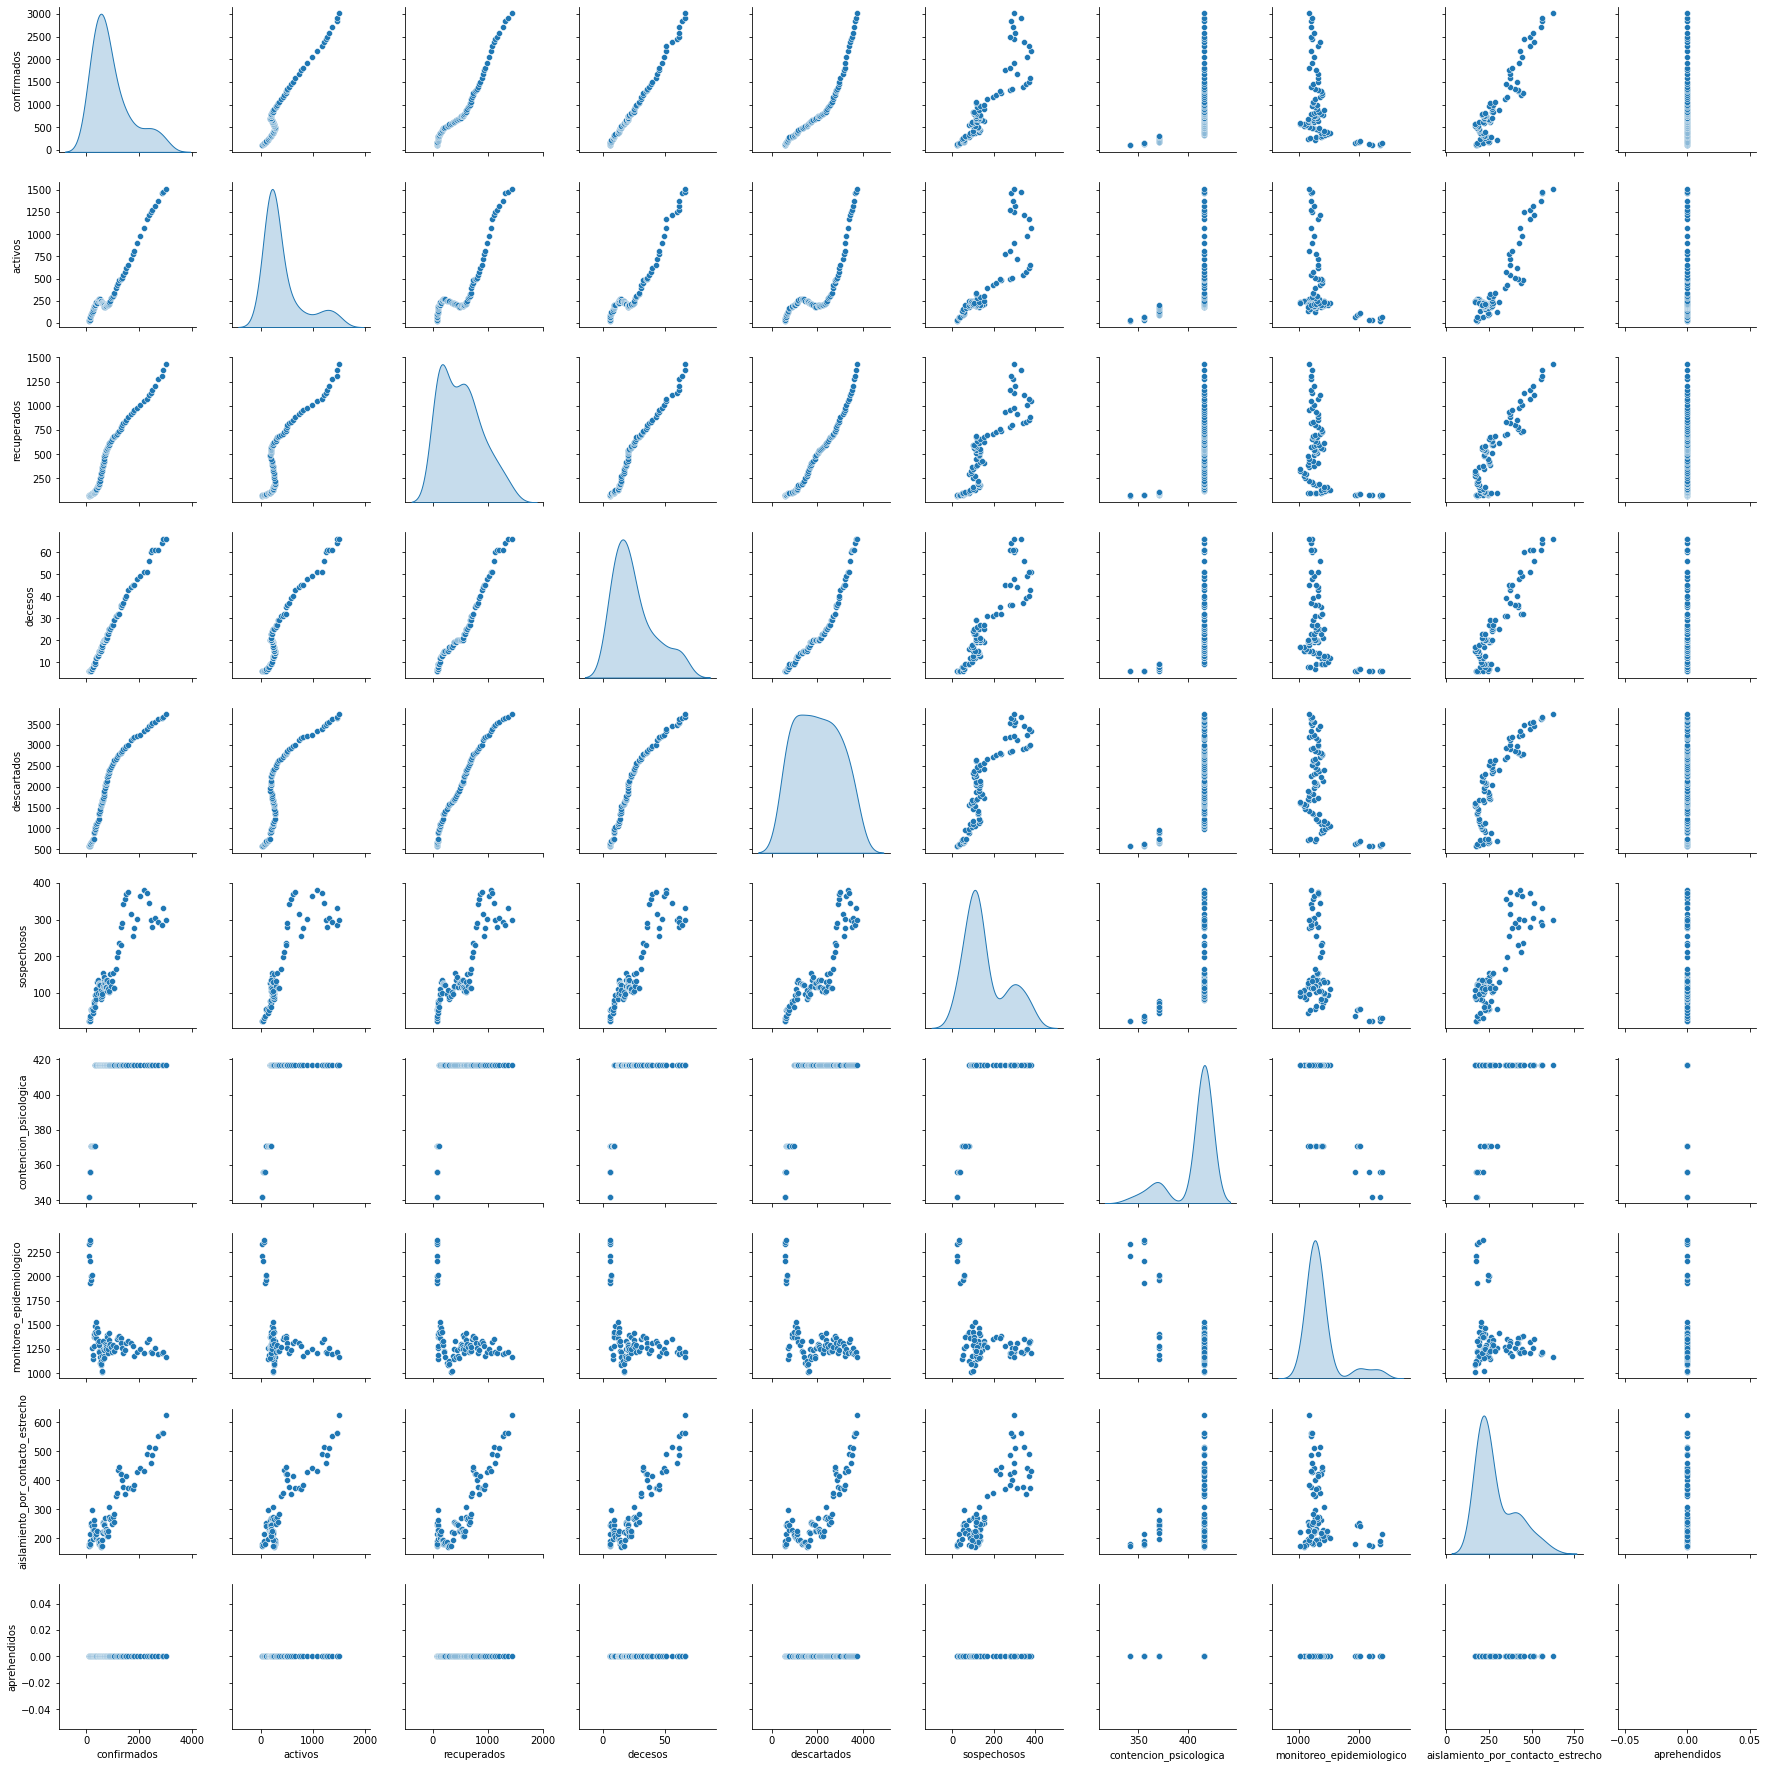

In [7]:
#Analyzing if the data is characterized by a gaussian distribution
sns.pairplot(data_casos, diag_kind='kde')

## After plotting the distributions, there is no real gaussian distribution. However, we can consider some features which have a similar shape. Taking a look at 'confirmados' variable...

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


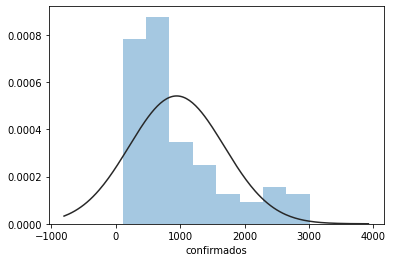

In [16]:
#Plotting distribution histogram
sns.distplot(data_casos['confirmados'], fit=norm , kde=False)

## Visualizing the distribution histogram, the variable 'confirmados' do not show a normal distribution shape at all. Let's verify the 'recuperados' variable...

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


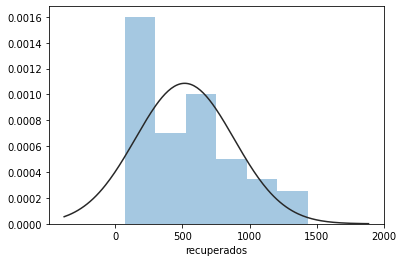

In [17]:
#Plotting distribution histogram
sns.distplot(data_casos['recuperados'], fit=norm , kde=False)

## In the case of 'recuperados' feature, we can see something that refers to a gaussian distribution. Thus, 'recuperados' can be considered reasonably as normal. Another variable that has some interesting distribution is 'decesos'...

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


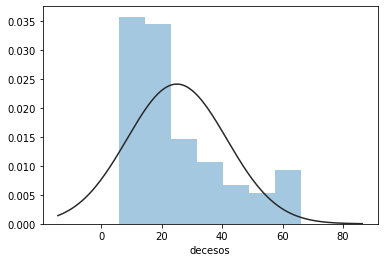

In [19]:
#Plotting distribution histogram
sns.distplot(data_casos['decesos'], fit=norm , kde=False)

## 'decesos' variable has a similar behavior with 'confirmados', so we won't consider as normal. The last one that we can take a look is the feature 'descartados'...

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


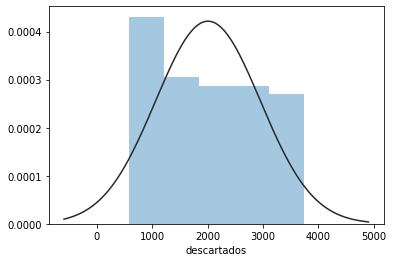

In [20]:
#Plotting distribution histogram
sns.distplot(data_casos['descartados'], fit=norm , kde=False)

## 'descartados' has a shape that remember something about gaussian distribution, so we let's consider as reasonably normal.

## Now, we are going to analyze the 'camas' dataset. 

In [22]:
#Show the cama dataset
data_camas

informeNumero       fecha  total_camas_hospitales  \
0             131  2020-09-25                     848   
1             130  2020-09-24                     848   
2             129  2020-09-23                     848   
3             128  2020-09-22                     848   
4             127  2020-09-21                     848   
..            ...         ...                     ...   
83             10  2020-07-04                     848   
84              9  2020-07-03                     848   
85              8  2020-07-02                     848   
86              7  2020-07-01                     848   
87              1  2020-06-30                     848   

    camas_ocupadas_hospitales  porcentaje_ocupacion_camas_hospitales  \
0                         401                                     47   
1                         391                                     46   
2                         402                                     47   
3                         391                                     46   
4                         368                                     43   
..                        ...                                    ...   
83                        343                                     40   
84                        349                                     41   
85                        358                                     42   
86                        386                                     45   
87                        347                                     40   

    camas_covid  camas_sospechosos_covid  camas_confirmados_covid  \
0           163                       42                       84   
1           163                       25                       86   
2           163                       21                       85   
3           163                       30                       83   
4           163                       32                       82   
..          ...                      ...                      ...   
83          155                       14                       14   
84          155                       18                       13   
85          155                       14                       14   
86          155                       12                       12   
87          155                       15                       10   

    porcentaje_ocupacion_camas_covid  uti_covid_totales  uti_covid_ocupadas  \
0                                 77                 32                  24   
1                                 68                 32                  17   
2                                 65                 32                  22   
3                                 69                 32                  21   
4                                 69                 32                  24   
..                               ...                ...                 ...   
83                                18                 32                   3   
84                                20                 32                   4   
85                                18                 32                   4   
86                                15                 32                   2   
87                                16                 32                   1   

    respiradores_totales  respiradores_ocupados  respiradores_covid_totales  \
0                    142                     41                          69   
1                    142                     39                          69   
2                    142                     42                          71   
3                    142                     43                          72   
4                    142                     40                          72   
..                   ...                    ...                         ...   
83                   143                     22                           0   
84                   143                    

## First of all, it's curious that there are some cases in which some features, like 'total_camas_hospitales', 'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales'and etc, have value 0. The reasons why such values occurs are shown in the last column of dataset, as we could imagine, such values ocurred due to the fact of problems in hospital communication. In any case, these variables need to be processing after. 


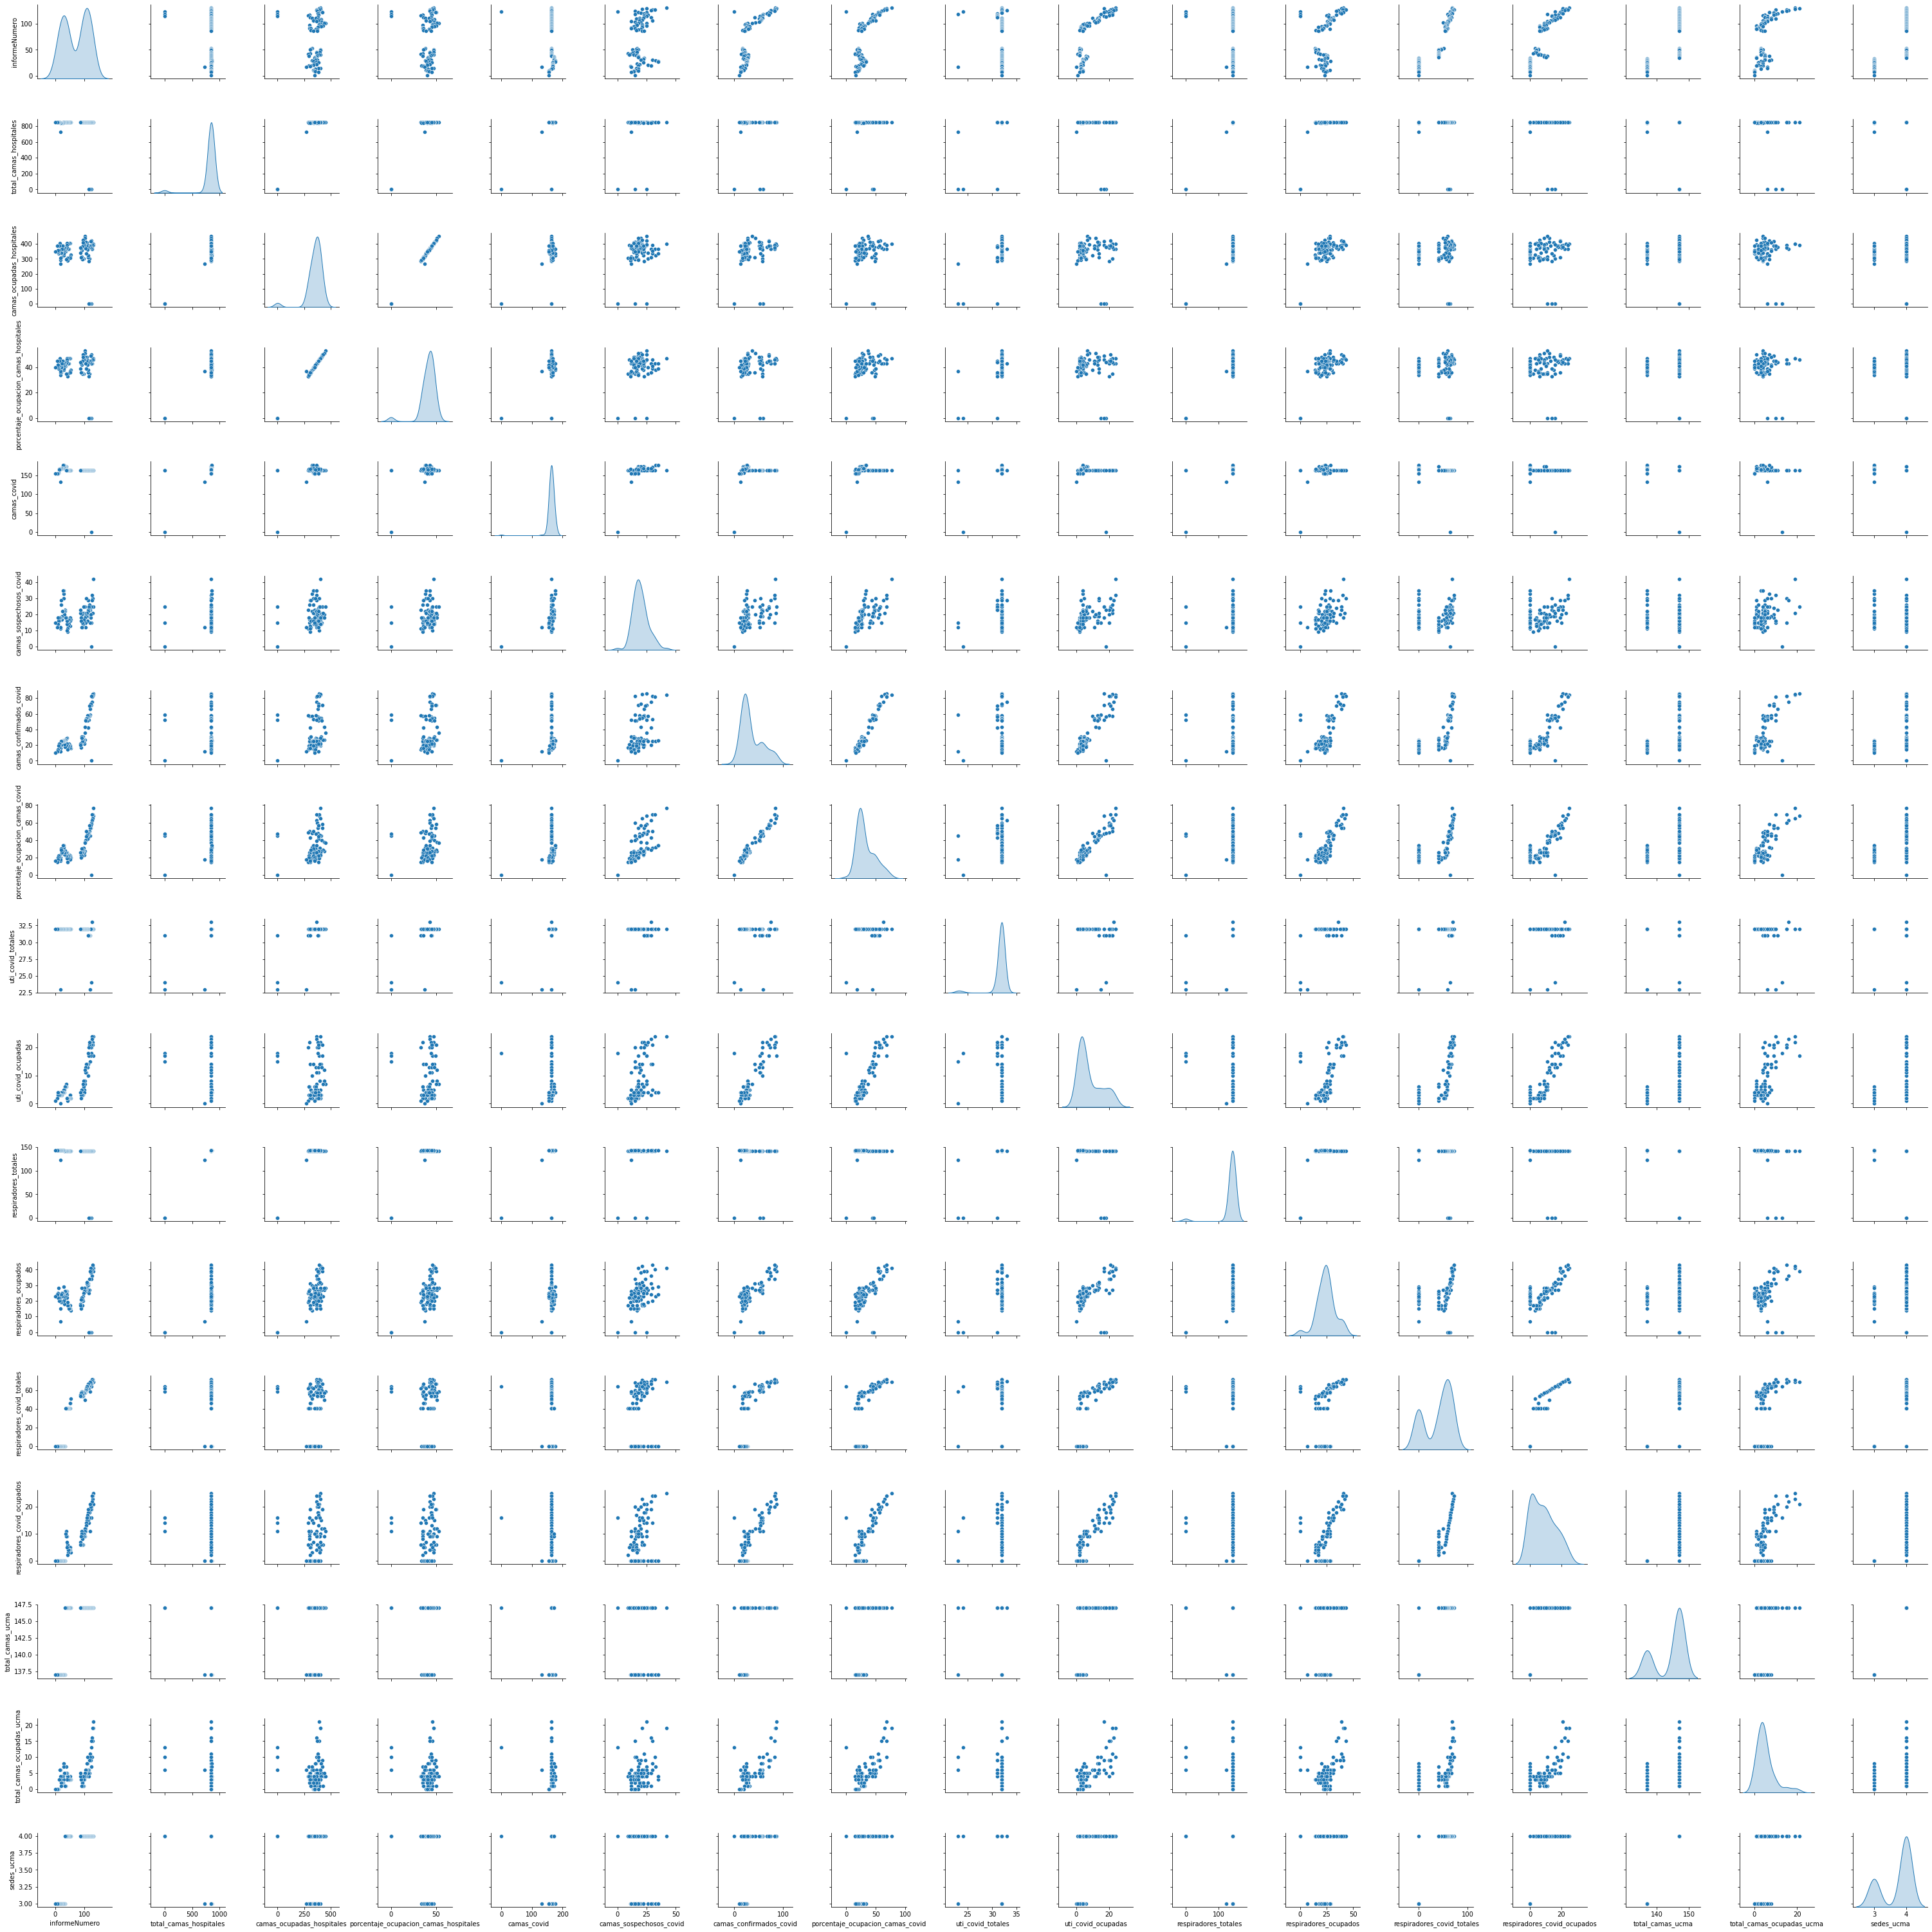

In [8]:
sns.pairplot(data_camas, diag_kind='kde')

## Analyzing the showed distributions, we can highlight three variables. The first one that we can take a look it's 'camas_sospechosos_covid' feature...

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


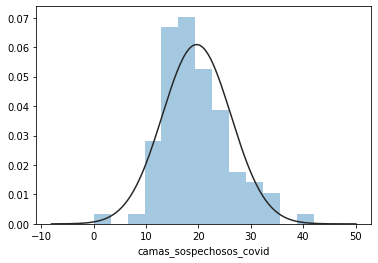

In [24]:
#Plotting distribution histogram
sns.distplot(data_camas['camas_sospechosos_covid'], fit=norm , kde=False)

## The histogram and the distribution seems to be fairly normal, so we can consider it. Another variable that need to be analyzed is the 'respirados_covid_ocupados'.

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


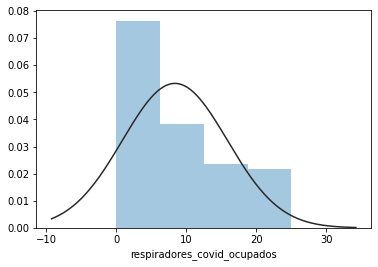

In [25]:
#Plotting distribution histogram
sns.distplot(data_camas['respiradores_covid_ocupados'], fit=norm , kde=False)

## This variable has some behavior that remember a gaussian, so we can consider as reasonably normal. Finally, the variable considered now it's the 'porcentaje_ocupacion,camas_covid'.

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


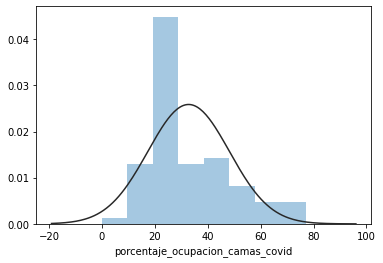

In [26]:
#Plotting distribution histogram
sns.distplot(data_camas['porcentaje_ocupacion_camas_covid'], fit=norm , kde=False)

## As the 'respiradores_covid_ocupados' this feature has some gaussian distribution behaviour, so we are going to consider as a possible normal.